In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
# Standard library imports.
import itertools
import json

# Related third party imports.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (12,6)

# Local application/library specific imports.

def add_cumulative(df):
    for L in df['latency_factor'].unique():
        for sim_id in df['simulation_id'].unique():
            mask = ((df['simulation_id'] == sim_id) & (df['latency_factor'] == L))
            df.loc[mask,'acceptable_count_cum'] = df.loc[mask,'acceptable_count'].cumsum()
            df.loc[mask,'vSDN_count_cum'] = df.loc[mask,'vSDN_count'].cumsum()
            df.loc[mask,'acceptance_ratio_cum'] = df.loc[mask,'acceptable_count_cum'] / df.loc[mask,'vSDN_count_cum']

## Save json to csv

In [5]:
network = '25_italy'
simulation_date = '2021-11-08'
placement_type = 'heu-hco'

df = pd.read_json(f"../results/{network}/{simulation_date}-{network}-{placement_type}.json")
df.latency_factor = df.latency_factor.round(1)

In [43]:
df.to_csv(f"../results/{network}/2021-11-04-{network}-ilp-hco.csv", index=False)

In [6]:
df.query(" vSDN_size == 2 ")

,acceptable_count,acceptance_ratio,acceptance_ratio_ilp,chs_avg,chs_avg_b,chs_avg_p,chs_max_b,chs_max_p,cp_objective,diameter,...,max_length,network,request_processing_time,shortest_k,vSDN_count,vSDN_count_ilp,vSDN_coverage,vSDN_generator_seed,vSDN_max_size_ilp,vSDN_size
0,12,0.352941,NaN,0,56,4,152,99,random,1586,...,158,25_italy,0.00,16,34,0,1.0,123,0,2
12,0,0.000000,NaN,0,-1,-1,-1,-1,random,1586,...,158,25_italy,0.00,16,34,0,1.0,123,0,2
24,0,0.000000,NaN,0,-1,-1,-1,-1,random,1586,...,158,25_italy,0.00,16,34,0,1.0,123,0,2
36,0,0.000000,NaN,0,-1,-1,-1,-1,random,1586,...,158,25_italy,0.00,16,34,0,1.0,123,0,2
48,0,0.000000,NaN,0,-1,-1,-1,-1,random,1586,...,158,25_italy,0.00,16,34,0,1.0,123,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,34,1.000000,NaN,0,1473,1356,1585,1581,random,1586,...,1586,25_italy,0.71,16,34,0,1.0,123,0,2
1152,34,1.000000,NaN,0,1485,1390,1585,1575,random,1586,...,1586,25_italy,0.89,16,34,0,1.0,123,0,2
1164,34,1.000000,NaN,0,1475,1372,1585,1582,random,1586,...,1586,25_italy,0.68,16,34,0,1.0,123,0,2
1176,34,1.000000,NaN,0,1463,1356,1585,1583,random,1586,...,1586,25_italy,1.09,16,34,0,1.0,123,0,2


## Analyse Data

In [51]:
network = '25_italy'
simulation_date = '2021-11-13'

placement_type = 'ilp-acc'
dfa = pd.read_json(f"../results/{network}/dynamic/{simulation_date}-{network}-{placement_type}.json")
dfa.latency_factor = dfa.latency_factor.round(1)
add_cumulative(dfa)

placement_type = 'ilp-opt'
dfo = pd.read_json(f"../results/{network}/dynamic/{simulation_date}-{network}-{placement_type}.json")
dfo.latency_factor = dfo.latency_factor.round(1)
add_cumulative(dfo)

In [52]:
dfo.query("latency_factor == 0.5")[['hp_runtime', 'acceptance_ratio', 'acceptance_ratio_cum', 'active_vSDN_count', 'mean_switch_hpair_count', 'simulation_id', 'timestep']]

,hp_runtime,acceptance_ratio,acceptance_ratio_cum,active_vSDN_count,mean_switch_hpair_count,simulation_id,timestep
1000,1.54,0.8,0.800000,4,57.20,0,1
1001,0.46,0.4,0.600000,6,21.20,0,2
1002,0.40,0.2,0.466667,3,26.84,0,3
1003,0.56,0.0,0.350000,3,20.88,0,4
1004,0.79,0.4,0.360000,4,26.08,0,5
...,...,...,...,...,...,...,...
1995,1.38,0.0,0.312500,1,29.76,9,96
1996,3.55,0.4,0.313402,2,57.20,9,97
1997,1.09,0.4,0.314286,4,33.12,9,98
1998,0.94,0.2,0.313131,4,32.20,9,99


In [53]:
dfa.groupby(by=['latency_factor', 'timestep'], as_index=False).mean()[['timestep', 'acceptance_ratio', 'acceptance_ratio_cum', 'active_vSDN_count']]

,timestep,acceptance_ratio,acceptance_ratio_cum,active_vSDN_count
0,1,0.02,0.020000,0.1
1,2,0.00,0.010000,0.1
2,3,0.08,0.033333,0.5
3,4,0.04,0.035000,0.4
4,5,0.00,0.028000,0.3
...,...,...,...,...
295,96,1.00,1.000000,12.5
296,97,1.00,1.000000,11.7
297,98,1.00,1.000000,11.8
298,99,1.00,1.000000,12.1


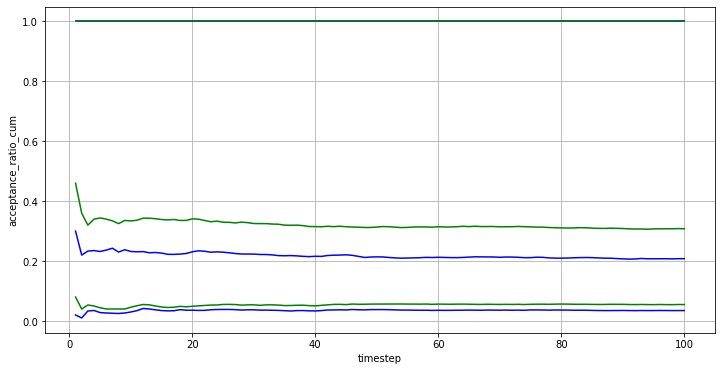

In [62]:
data = dfa.groupby(by=['latency_factor', 'timestep'], as_index=False).mean()
sns.lineplot(x='timestep', y='acceptance_ratio_cum', data=data.query("latency_factor == 0.4"), color='blue')
sns.lineplot(x='timestep', y='acceptance_ratio_cum', data=data.query("latency_factor == 0.5"), color='blue')
sns.lineplot(x='timestep', y='acceptance_ratio_cum', data=data.query("latency_factor == 0.6"), color='blue')

data = dfo.groupby(by=['latency_factor', 'timestep'], as_index=False).mean()
sns.lineplot(x='timestep', y='acceptance_ratio_cum', data=data.query("latency_factor == 0.4"), color='green')
sns.lineplot(x='timestep', y='acceptance_ratio_cum', data=data.query("latency_factor == 0.5"), color='green')
sns.lineplot(x='timestep', y='acceptance_ratio_cum', data=data.query("latency_factor == 0.6"), color='green')
plt.grid()

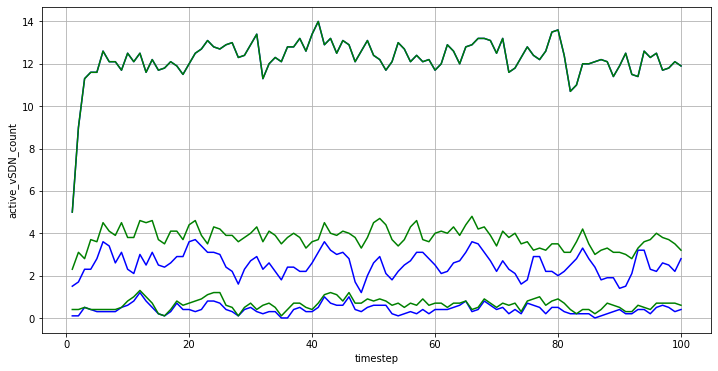

In [64]:
data = dfa.groupby(by=['latency_factor', 'timestep'], as_index=False).mean()
sns.lineplot(x='timestep', y='active_vSDN_count', data=data.query("latency_factor == 0.4"), color='blue')
sns.lineplot(x='timestep', y='active_vSDN_count', data=data.query("latency_factor == 0.5"), color='blue')
sns.lineplot(x='timestep', y='active_vSDN_count', data=data.query("latency_factor == 0.6"), color='blue')

data = dfo.groupby(by=['latency_factor', 'timestep'], as_index=False).mean()
sns.lineplot(x='timestep', y='active_vSDN_count', data=data.query("latency_factor == 0.4"), color='green')
sns.lineplot(x='timestep', y='active_vSDN_count', data=data.query("latency_factor == 0.5"), color='green')
sns.lineplot(x='timestep', y='active_vSDN_count', data=data.query("latency_factor == 0.6"), color='green')
plt.grid()

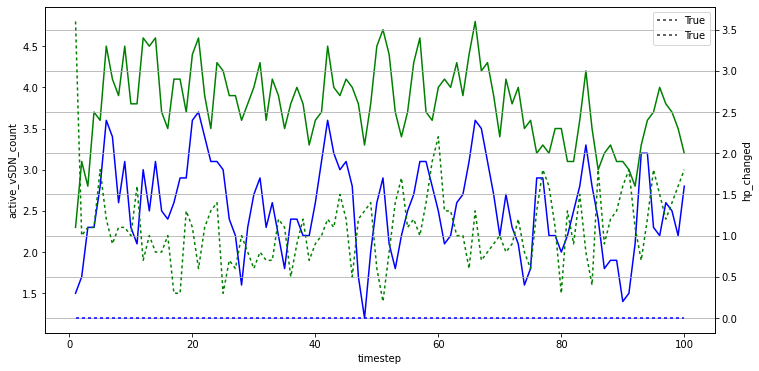

In [69]:
fig, ax = plt.subplots()
ax2 = ax.twinx()

data = dfa.groupby(by=['latency_factor', 'timestep'], as_index=False).mean()
sns.lineplot(x='timestep', y='active_vSDN_count', data=data.query("latency_factor == 0.5"), color='blue', ax=ax)
sns.lineplot(x='timestep', y='hp_changed', data=data.query("latency_factor == 0.5"), color='blue', ax=ax2, style=True, dashes=[(2,2)])

data = dfo.groupby(by=['latency_factor', 'timestep'], as_index=False).mean()
sns.lineplot(x='timestep', y='active_vSDN_count', data=data.query("latency_factor == 0.5"), color='green', ax=ax)
sns.lineplot(x='timestep', y='hp_changed', data=data.query("latency_factor == 0.5"), color='green', ax=ax2, style=True, dashes=[(2,2)])
plt.grid()

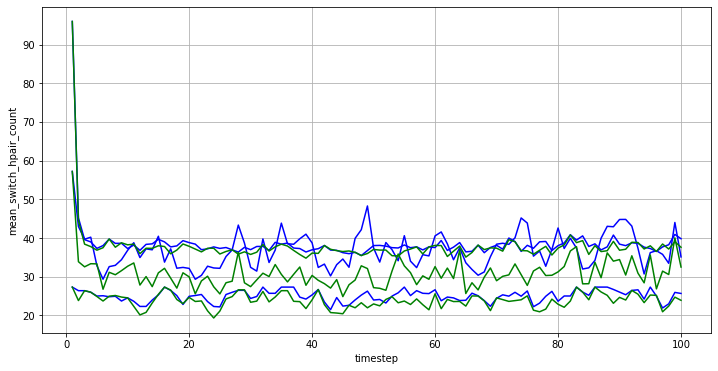

In [63]:
data = dfa.groupby(by=['latency_factor', 'timestep'], as_index=False).mean()
sns.lineplot(x='timestep', y='mean_switch_hpair_count', data=data.query("latency_factor == 0.4"), color='blue')
sns.lineplot(x='timestep', y='mean_switch_hpair_count', data=data.query("latency_factor == 0.5"), color='blue')
sns.lineplot(x='timestep', y='mean_switch_hpair_count', data=data.query("latency_factor == 0.6"), color='blue')

data = dfo.groupby(by=['latency_factor', 'timestep'], as_index=False).mean()
sns.lineplot(x='timestep', y='mean_switch_hpair_count', data=data.query("latency_factor == 0.4"), color='green')
sns.lineplot(x='timestep', y='mean_switch_hpair_count', data=data.query("latency_factor == 0.5"), color='green')
sns.lineplot(x='timestep', y='mean_switch_hpair_count', data=data.query("latency_factor == 0.6"), color='green')
plt.grid()

In [7]:
for df in [dfh, dfi, dfa, dfo]:
    print(df.query("latency_factor == 0.6 & vSDN_size == 8")[['acceptance_ratio','hp_runtime']].mean())

acceptance_ratio    0.437
hp_runtime          7.725
dtype: float64
acceptance_ratio    0.072
hp_runtime          0.752
dtype: float64
acceptance_ratio     1.000
hp_runtime          15.337
dtype: float64
acceptance_ratio     1.000
hp_runtime          14.651
dtype: float64


In [8]:
dfh.query("latency_factor == 0.5 & vSDN_size == 6")[['acceptance_ratio','hp_runtime','h_list']]

,acceptance_ratio,hp_runtime,h_list
484,0.45,4.93,"[0, 4, 13, 19, 20, 23]"
496,0.48,6.98,"[0, 4, 13, 19, 20, 23]"
508,0.41,5.02,"[0, 4, 13, 19, 20, 23]"
520,0.52,5.91,"[0, 3, 13, 19, 20, 23]"
532,0.74,6.24,"[0, 5, 13, 19, 20, 23]"
544,0.66,5.49,"[0, 5, 13, 20, 23, 24]"
556,0.51,7.53,"[3, 4, 7, 20, 22, 23]"
568,0.52,6.91,"[0, 3, 13, 19, 20, 23]"
580,0.70,5.62,"[0, 5, 13, 20, 23, 24]"
592,0.74,5.06,"[0, 5, 13, 19, 20, 23]"


In [9]:
dfi.query("latency_factor == 0.5 & vSDN_size == 6")[['acceptance_ratio','hp_runtime','h_list']]

,acceptance_ratio,hp_runtime,h_list
484,0.01,0.88,"[3, 4, 6, 20, 22, 23]"
496,0.03,0.68,"[3, 4, 6, 20, 22, 23]"
508,0.01,1.03,"[3, 4, 6, 20, 22, 23]"
520,0.02,1.17,"[3, 4, 6, 20, 22, 23]"
532,0.01,0.81,"[3, 4, 6, 20, 22, 23]"
544,0.04,1.07,"[3, 4, 6, 20, 22, 23]"
556,0.01,0.90,"[3, 4, 6, 20, 22, 23]"
568,0.01,0.73,"[3, 4, 6, 20, 22, 23]"
580,0.03,0.72,"[3, 4, 6, 20, 22, 23]"
592,0.04,1.05,"[3, 4, 6, 20, 22, 23]"


In [10]:
dfa.query("latency_factor == 0.5 & vSDN_size == 6")[['acceptance_ratio','hp_runtime','h_list']]

,acceptance_ratio,hp_runtime,h_list
484,0.80,36.94,"[0, 5, 13, 20, 23, 24]"
496,0.85,98.62,"[5, 6, 15, 20, 23, 24]"
508,0.77,38.88,"[5, 6, 15, 20, 23, 24]"
520,0.80,31.44,"[0, 5, 13, 20, 23, 24]"
532,0.70,32.76,"[0, 4, 13, 19, 20, 23]"
544,0.72,53.14,"[5, 6, 15, 20, 23, 24]"
556,0.78,38.83,"[0, 5, 13, 20, 23, 24]"
568,0.82,35.03,"[5, 6, 15, 20, 23, 24]"
580,0.76,37.43,"[5, 7, 15, 20, 23, 24]"
592,0.81,48.31,"[5, 7, 15, 20, 23, 24]"


In [11]:
dfo.query("latency_factor == 0.5 & vSDN_size == 6")[['acceptance_ratio','hp_runtime','h_list']]

,acceptance_ratio,hp_runtime,h_list
484,0.80,34.97,"[0, 5, 13, 20, 23, 24]"
496,0.86,57.46,"[5, 7, 15, 20, 23, 24]"
508,0.79,61.82,"[5, 6, 15, 20, 23, 24]"
520,0.81,37.05,"[0, 5, 13, 20, 23, 24]"
532,0.79,31.34,"[5, 7, 15, 20, 23, 24]"
544,0.82,48.07,"[0, 5, 13, 20, 23, 24]"
556,0.78,34.42,"[5, 6, 15, 20, 23, 24]"
568,0.82,48.56,"[5, 7, 15, 20, 23, 24]"
580,0.80,26.72,"[0, 5, 13, 20, 23, 24]"
592,0.81,57.95,"[5, 7, 15, 20, 23, 24]"


## Save data for latex/pgfplots

In [11]:
network = '25_italy'
simulation_date = '2021-11-12'
placement_type = 'ilp-acc'

df = pd.read_json(f"../results/{network}/{simulation_date}-{network}-{placement_type}-100.json")
df.latency_factor = df.latency_factor.round(1)
df.drop(labels=['h_list'], axis=1, inplace=True)
df = df.groupby(by=['latency_factor','vSDN_size']).mean()

In [12]:
df.to_csv(f"../results/{network}/{simulation_date}-{network}-{placement_type}-100-mean-pgf.csv")